# <center>***监督学习***<center>

更多代码欢迎传送至：
>https://gitee.com/tanxin12/tanxin

入门补充：

1、机器学习分为监督学习（分类、回归）和无监督学习（聚类），它们的区别在于是否有标签

2、监督学习的数据集通常包含两部分：特征空间与标签

3、机器学习的过程大致为：数据采集，数据预处理，特征工程，模型建立，模型评价，模型融合



## **监督学习知识科普**

***<center>使用分类学习器（使用某个分类器需要导入对应函数）***

In [1]:
# Model = LogisticRegression(max_iter=1000)  逻辑回归
# Model = LinearDiscriminantAnalysis()       线性判别分析
# Model = KNeighborsClassifier()             K近邻
# Model = DecisionTreeClassifier()           决策树
# Model = GaussianNB()                       朴素贝叶斯
# Model = SVC(probability=True)              支持向量机

***<center>使用回归学习器（使用某个回归器需要导入对应函数）***

In [2]:
# Model = LinearRegression()          线性回归
# Model = DecisionTreeRegressor()     决策树回归
# Model = SVR()                       支持向量机回归

***<center>本文件主要介绍监督学习，后面有文件专门介绍聚类分析***

## **一、导入此文件所需要的所有函数**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## **二、准备训练模型使用的数据集**

### <center>**读取数据**

In [4]:
names = ['萼片长度', '萼片宽度', '花瓣长度', '花瓣宽度', 'Class']
df = pd.read_csv(".\data\Iris.txt", names=names)

### <center>**划分特征空间与标签**

In [5]:
# 以Class为标签，其余特征构成特征空间
X = df.drop("Class", axis=1)
y = df.Class

### <center>**随机划分训练集和测试集**

In [6]:
# 调用scikit-learn库进行数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **三、建立模型、训练模型**

In [7]:
# 调用scikit-learn库的支持向量机函数SVC
# 这一步叫模型的初始化
Model = SVC(probability=True)

# 这一步是用训练集的特征空间和标签对模型进行训练
Model.fit(X_train, y_train)

SVC(probability=True)

## **四、使用模型预测**

In [8]:
# 使用测试集的数据对测试集的标签进行预测
y_pred = Model.predict(X_test)

## **五、模型的评价**

### **<center>分类模型通常用混淆矩阵等评价**

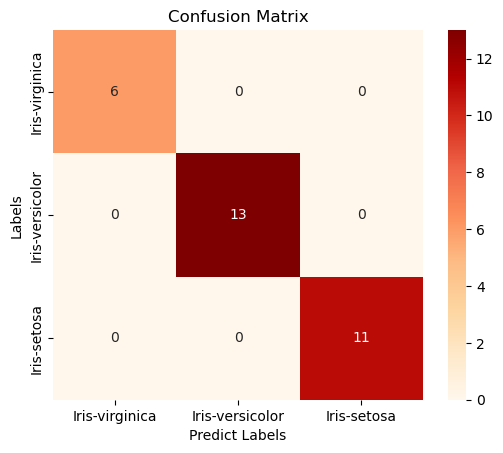

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 虽然这个混淆矩阵是个 array 没有标签，但对应的标签就是按我下面labels的顺序排列的
mat = confusion_matrix(y_test, y_pred, 
                labels=["Iris-virginica", "Iris-versicolor", 'Iris-setosa'])

# 形成热力图
sns.heatmap(mat, annot=True, square="equal", cmap="OrRd",
    xticklabels=["Iris-virginica", "Iris-versicolor", 'Iris-setosa'], 
    yticklabels=["Iris-virginica", "Iris-versicolor", 'Iris-setosa'])

plt.xlabel("Predict Labels")
plt.ylabel("Labels")
plt.title("Confusion Matrix")
plt.show()

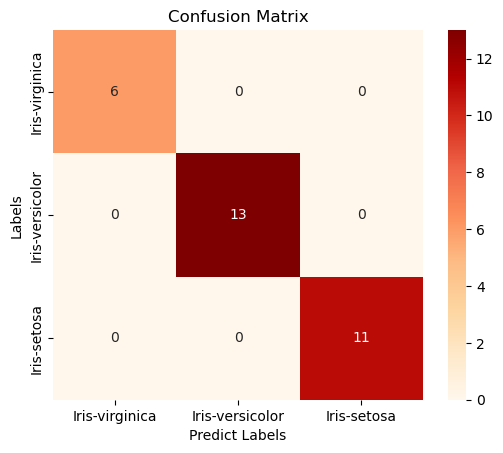

In [10]:
# 虽然这个混淆矩阵是个 array 没有标签，但对应的标签就是按我下面labels的顺序排列的
mat = confusion_matrix(y_test, y_pred, 
                labels=["Iris-virginica", "Iris-versicolor", 'Iris-setosa'])

# 形成热力图
sns.heatmap(mat, annot=True, square="equal", cmap="OrRd", fmt="d",
    xticklabels=["Iris-virginica", "Iris-versicolor", 'Iris-setosa'], 
    yticklabels=["Iris-virginica", "Iris-versicolor", 'Iris-setosa'])

plt.xlabel("Predict Labels")
plt.ylabel("Labels")
plt.title("Confusion Matrix")
plt.show()

In [11]:
from sklearn.metrics import classification_report

# 打印分类模型最好的评价系统
print("评估数据结果打印:\n", classification_report(y_test, y_pred))

评估数据结果打印:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### **<center>回归模型通常用MSE等进行评价**

In [12]:
from sklearn.metrics import mean_squared_error

# Mean Squared Error（均方误差）
# print(mean_squared_error(y_test, y_pred))

In [13]:
from sklearn.metrics import mean_absolute_error

# Mean Absolute Error（平均绝对误差）
# print(mean_absolute_error(y_test, y_pred))

In [14]:
from sklearn.metrics import r2_score

# R² score（决定系数、R方）
# print(r2_score(y_test, y_pred))